# Data onderzoek + Lineaire Regressie

### Imports

In [1]:
import pandas as pd
from IPython.display import display

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

### Data inlezen en "vervormen"
De dataset Nutritions wordt gebruikt in dit notebook. Hier staan van alle recepten gegevens zoals energie, koolhydraten, eiwit etcetera.

Op dit moment is voor elk gegeven een nieuwe rij van het recept ingemaakt en 2 kolommen waar categorie en dan de waarde staat. Om de dataframe bruikbaar te maken (voor model bijvoorbeeld) wordt het dataframe gepivot.

In [2]:
tags_file = "tags"
recipes_file = "recipes"
nutrit_file = "nutritions"
ingred_file = "ingredients"

nutrit_df = pd.read_csv(f"/data/foodboost/{nutrit_file}.csv") 
pd.options.display.max_columns = None
nutrit_df

,Unnamed: 0,recipe,nutrition,value
0,0,Kruidnoten met choco-discodip,energie,260 kcal
1,1,Kruidnoten met choco-discodip,koolhydraten,34 g
2,2,Kruidnoten met choco-discodip,waarvan suikers,22 g
3,3,Kruidnoten met choco-discodip,natrium,200 mg
4,4,Kruidnoten met choco-discodip,eiwit,3 g
...,...,...,...,...
58760,58760,Pittige truffels,waarvan verzadigd,0 g
58761,58761,Biefstuk met rodewijnsaus en ham,energie,360 kcal
58762,58762,Biefstuk met rodewijnsaus en ham,koolhydraten,2 g
58763,58763,Biefstuk met rodewijnsaus en ham,eiwit,28 g


nutrition worden als kolommen neergezet met de waardes in de rijen ingevuld en met recipes als index.
Waardes worden als floats in tabel gezet.

In [3]:
# omzetten naar nutrition als kolommen
nutrit_df_grouped = nutrit_df.pivot(index='recipe', columns='nutrition', values='value')

nutrit_df_grouped

nutrition,eiwit,energie,koolhydraten,natrium,vet,vezels,waarvan suikers,waarvan verzadigd
recipe,,,,,,,,
Andijviestamppot met gebakken salami,25 g,630 kcal,36 g,1875 mg,41 g,7 g,NaN,17 g
Bietensoep met selderijroom,3 g,160 kcal,11 g,1160 mg,11 g,5 g,NaN,5 g
Libanese wraps met appel-koolsalade,21 g,440 kcal,45 g,440 mg,18 g,9 g,NaN,3 g
Plaattaart met gegrilde groenten en witte kaas,16 g,550 kcal,38 g,760 mg,35 g,8 g,11 g,16 g
Sticky cauliflower (gegrilde bloemkoolroosjes) van Jord Althuizen,8 g,235 kcal,16 g,800 mg,14 g,6 g,NaN,2 g
...,...,...,...,...,...,...,...,...
Zweedse gehaktballetjes met room,33 g,640 kcal,26 g,520 mg,45 g,2 g,NaN,22 g
Zweedse vegaballetjes met aardappel &amp; broccoli,38 g,770 kcal,76 g,1320 mg,31 g,17 g,NaN,10 g
Zwitserse kaasfondue,56 g,850 kcal,7 g,920 mg,63 g,0 g,5 g,38 g


In [4]:
nutrit_df_grouped = nutrit_df_grouped.reset_index()

In [5]:
nutrit_df_grouped = nutrit_df_grouped.dropna()
nutrit_df_grouped

nutrition,recipe,eiwit,energie,koolhydraten,natrium,vet,vezels,waarvan suikers,waarvan verzadigd
3,Plaattaart met gegrilde groenten en witte kaas,16 g,550 kcal,38 g,760 mg,35 g,8 g,11 g,16 g
9,'Caprese' hasselback,10 g,195 kcal,7 g,360 mg,14 g,2 g,6 g,7 g
11,'Caprese' saladekrans,7 g,150 kcal,3 g,120 mg,12 g,1 g,3 g,5 g
16,'Kapsalon' met&nbsp;vegetarische&nbsp;kipshoar...,29 g,505 kcal,35 g,880 mg,25 g,12 g,6 g,6 g
20,'Nasi' met pindasaus en vegan kipstuckjes,30 g,890 kcal,110 g,1560 mg,33 g,15 g,33 g,6 g
...,...,...,...,...,...,...,...,...,...
8688,Zwarte bonen brownies,5 g,185 kcal,15 g,80 mg,11 g,4 g,9 g,6 g
8690,"Zwarte-bonenburgers met pittige tomatensaus, q...",24 g,695 kcal,78 g,40 mg,28 g,17 g,11 g,4 g
8691,Zwarte-bonensalade met mais en garnalen,22 g,410 kcal,33 g,560 mg,18 g,13 g,10 g,3 g
8703,Zwitserse kaasfondue,56 g,850 kcal,7 g,920 mg,63 g,0 g,5 g,38 g


In [6]:
#Kolommen met alleen de getallen
lijst_eiwit = [nutrit_df_grouped.iloc[i][1][:-2] for i in range(0, len(nutrit_df_grouped))]
lijst_energie = [nutrit_df_grouped.iloc[i][2][:-5] for i in range(0, len(nutrit_df_grouped))]
lijst_koolhydraten = [nutrit_df_grouped.iloc[i][3][:-2] for i in range(0, len(nutrit_df_grouped))]
lijst_natrium = [nutrit_df_grouped.iloc[i][4][:-3] for i in range(0, len(nutrit_df_grouped))]
lijst_vet = [nutrit_df_grouped.iloc[i][5][:-2] for i in range(0, len(nutrit_df_grouped))]
lijst_vezels = [nutrit_df_grouped.iloc[i][6][:-2] for i in range(0, len(nutrit_df_grouped))]
lijst_suikers = [nutrit_df_grouped.iloc[i][7][:-2] for i in range(0, len(nutrit_df_grouped))]
lijst_verzadigd = [nutrit_df_grouped.iloc[i][8][:-2] for i in range(0, len(nutrit_df_grouped))]

nutrit_df_grouped['eiwit'] = lijst_eiwit
nutrit_df_grouped['energie'] = lijst_energie
nutrit_df_grouped['koolhydraten'] = lijst_koolhydraten
nutrit_df_grouped['natrium'] = lijst_natrium
nutrit_df_grouped['vet'] = lijst_vet
nutrit_df_grouped['vezels'] = lijst_vezels
nutrit_df_grouped['waarvan suikers'] = lijst_suikers
nutrit_df_grouped['waarvan verzadigd'] = lijst_verzadigd

nutrit_df_grouped['eiwit'] = nutrit_df_grouped['eiwit'].astype('float')
nutrit_df_grouped['energie'] = nutrit_df_grouped['energie'].astype('float')
nutrit_df_grouped['koolhydraten'] = nutrit_df_grouped['koolhydraten'].astype('float')
nutrit_df_grouped['natrium'] = nutrit_df_grouped['natrium'].astype('float')
nutrit_df_grouped['vet'] = nutrit_df_grouped['vet'].astype('float')
nutrit_df_grouped['vezels'] = nutrit_df_grouped['vezels'].astype('float')
nutrit_df_grouped['waarvan suikers'] = nutrit_df_grouped['waarvan suikers'].astype('float')
nutrit_df_grouped['waarvan verzadigd'] = nutrit_df_grouped['waarvan verzadigd'].astype('float')

In [7]:
nutrit_df_grouped

nutrition,recipe,eiwit,energie,koolhydraten,natrium,vet,vezels,waarvan suikers,waarvan verzadigd
3,Plaattaart met gegrilde groenten en witte kaas,16.0,550.0,38.0,760.0,35.0,8.0,11.0,16.0
9,'Caprese' hasselback,10.0,195.0,7.0,360.0,14.0,2.0,6.0,7.0
11,'Caprese' saladekrans,7.0,150.0,3.0,120.0,12.0,1.0,3.0,5.0
16,'Kapsalon' met&nbsp;vegetarische&nbsp;kipshoar...,29.0,505.0,35.0,880.0,25.0,12.0,6.0,6.0
20,'Nasi' met pindasaus en vegan kipstuckjes,30.0,890.0,110.0,1560.0,33.0,15.0,33.0,6.0
...,...,...,...,...,...,...,...,...,...
8688,Zwarte bonen brownies,5.0,185.0,15.0,80.0,11.0,4.0,9.0,6.0
8690,"Zwarte-bonenburgers met pittige tomatensaus, q...",24.0,695.0,78.0,40.0,28.0,17.0,11.0,4.0
8691,Zwarte-bonensalade met mais en garnalen,22.0,410.0,33.0,560.0,18.0,13.0,10.0,3.0
8703,Zwitserse kaasfondue,56.0,850.0,7.0,920.0,63.0,0.0,5.0,38.0


### Plotten Koolhydraten en Energie
Hieronder wordt een scatterplot weergegeven met de koolhydraten op de x-as en de energie op de y-as.

Text(0.5, 1.0, 'Koolhydraten en Calorieën')

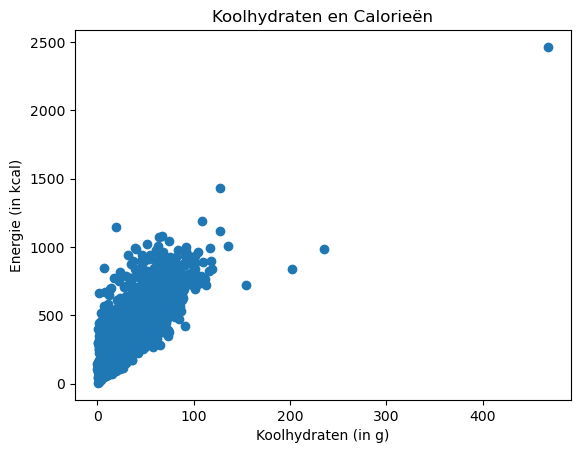

In [8]:
X = nutrit_df_grouped['koolhydraten'].to_frame()
y = nutrit_df_grouped['energie'].to_frame()
plt.scatter(X,y)
plt.xlabel('Koolhydraten (in g)')
plt.ylabel('Energie (in kcal)')
plt.title('Koolhydraten en Calorieën')

zonder uitbijter:

In [9]:
# remove waarde met koolhydraten > 300
nutrit_df_grouped_2 = nutrit_df_grouped.drop(nutrit_df_grouped[nutrit_df_grouped['koolhydraten'] > int(300)].index)

In [10]:
nutrit_df_grouped_2

nutrition,recipe,eiwit,energie,koolhydraten,natrium,vet,vezels,waarvan suikers,waarvan verzadigd
3,Plaattaart met gegrilde groenten en witte kaas,16.0,550.0,38.0,760.0,35.0,8.0,11.0,16.0
9,'Caprese' hasselback,10.0,195.0,7.0,360.0,14.0,2.0,6.0,7.0
11,'Caprese' saladekrans,7.0,150.0,3.0,120.0,12.0,1.0,3.0,5.0
16,'Kapsalon' met&nbsp;vegetarische&nbsp;kipshoar...,29.0,505.0,35.0,880.0,25.0,12.0,6.0,6.0
20,'Nasi' met pindasaus en vegan kipstuckjes,30.0,890.0,110.0,1560.0,33.0,15.0,33.0,6.0
...,...,...,...,...,...,...,...,...,...
8688,Zwarte bonen brownies,5.0,185.0,15.0,80.0,11.0,4.0,9.0,6.0
8690,"Zwarte-bonenburgers met pittige tomatensaus, q...",24.0,695.0,78.0,40.0,28.0,17.0,11.0,4.0
8691,Zwarte-bonensalade met mais en garnalen,22.0,410.0,33.0,560.0,18.0,13.0,10.0,3.0
8703,Zwitserse kaasfondue,56.0,850.0,7.0,920.0,63.0,0.0,5.0,38.0


Text(0.5, 1.0, 'Koolhydraten en Calorieën')

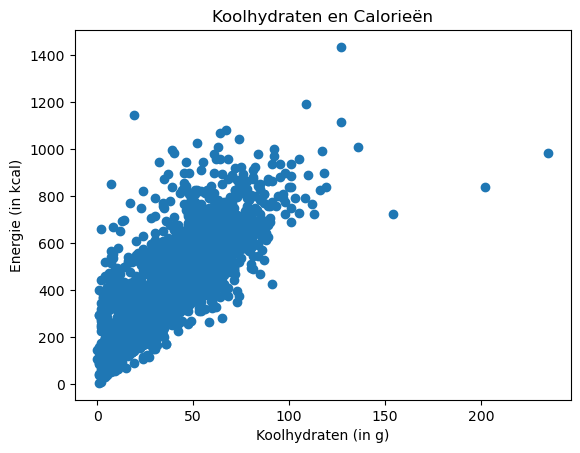

In [11]:
X_2 = nutrit_df_grouped_2['koolhydraten'].to_frame()
y_2 = nutrit_df_grouped_2['energie'].to_frame()
plt.scatter(X_2,y_2)
plt.xlabel('Koolhydraten (in g)')
plt.ylabel('Energie (in kcal)')
plt.title('Koolhydraten en Calorieën')

### Lineaire Regressie
Hieronder wordt de data gespiltst in train en testset en wordt een simpel Lineair Regressie model gefit op de traindata en vervolgens getest op de testdata.

In [12]:
# 30% testeset, 70% trainset creëeren
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [13]:
# een lineair regressie model fitten op traindata
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [14]:
# voorspelling voor y doen over testdata
y_pred = linreg.predict(X_test)

Text(0, 0.5, 'Energie (in kcal)')

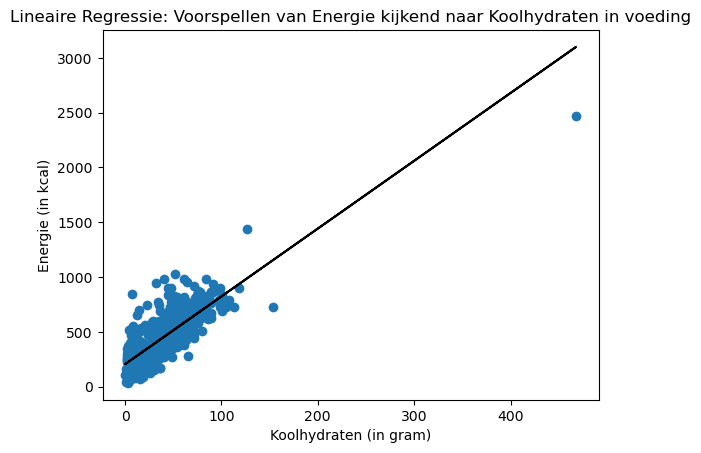

In [15]:
# we plotten de functie voor y
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color = "black")

plt.title("Lineaire Regressie: Voorspellen van Energie kijkend naar Koolhydraten in voeding")
plt.xlabel("Koolhydraten (in gram)")
plt.ylabel("Energie (in kcal)")

In [16]:
# Compute and print R^2 and RMSE
print("R^2: {}".format(linreg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.6050305656017805
Root Mean Squared Error: 144.71522996711306


zonder uitbijter:

In [17]:
# 30% testeset, 70% trainset creëeren
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.3, random_state = 42)
# een lineair regressie model fitten op traindata
linreg_2 = LinearRegression()
linreg_2.fit(X_train_2, y_train_2)
# voorspelling voor y doen over testdata
y_pred_2 = linreg_2.predict(X_test_2)

Text(0, 0.5, 'Energie (in kcal)')

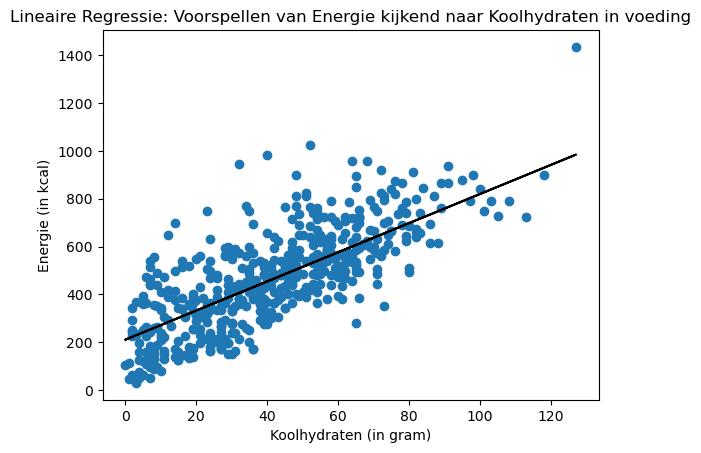

In [18]:
# we plotten de functie voor y
plt.scatter(X_test_2, y_test_2)
plt.plot(X_test_2, y_pred_2, color = "black")

plt.title("Lineaire Regressie: Voorspellen van Energie kijkend naar Koolhydraten in voeding")
plt.xlabel("Koolhydraten (in gram)")
plt.ylabel("Energie (in kcal)")

In [19]:
# Compute and print R^2 and RMSE
print("R^2: {}".format(linreg_2.score(X_test_2, y_test_2)))
rmse_2 = np.sqrt(mean_squared_error(y_test_2, y_pred_2))
print("Root Mean Squared Error: {}".format(rmse_2))

R^2: 0.5698588823633892
Root Mean Squared Error: 137.84239118688077


# Conclusie
Dit is een hele hoge RMSE, dus de gemiddelde afwijking is erg hoog. Je kan hier concluderen dat de voorspellingen van het Lineair Regressie model niet heel accuraat zijn. Er zouden nog andere modellen getest kunnen worden en modellen kunnen nog gefinetuned kunnen worden. Als dit geen goede resultaten op levert lijkt er geen sterk verband te zijn tussen koolhydraten en energie. Het grote getal komt ook omdat de waardes van energie erg verschillend zijn, namelijk zowat 0 en bijna 1400. de spreiding is dus best groot.